# Research on Borrower Reliability

- Task - to determine whether marital status, number of children, income, and loan purpose affect the timely repayment of the loan.
- Input data from the bank - statistics on the solvency of customers.
- The results of the research are intended for further use in building a credit scoring model.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

from pymystem3 import Mystem

from google.colab import drive
drive.mount('/content/drive')

from tqdm import tqdm
from collections import Counter

Mounted at /content/drive


## Data Overview

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum_projects/\
Borrower_Reliability/data.csv')

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Let's display the unique values of the columns with categorical data and see if there are any anomalies.

In [ ]:
columns_to_check = ['children', 'dob_years', 'education', 'education_id', 
                    'family_status', 'family_status_id', 'gender', 
                    'income_type', 'debt', 'purpose']
for col in columns_to_check:
    display(df[col].unique())

array([ 1,  0,  3,  2, -1,  4, 20,  5])

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

array([0, 1, 2, 3, 4])

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

array([0, 1, 2, 3, 4])

array(['F', 'M', 'XNA'], dtype=object)

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

array([0, 1])

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

### Conclusion

The table has 12 columns. The data types are `int`, `float` and `object`.

According to the documentation:

- `children` - number of children in the family
- `days_employed` - total work experience in days
- `dob_years` - age of the client in years
- `education` - level of education of the client
- `education_id` - identifier of the level of education
- `family_status` - family status
- `family_status_id` - identifier of the family status
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - whether the client had debt for loan repayment
- `total_income` - monthly income in rubles
- `purpose` - purpose of loan

There are no stylistic errors in the column names.

There are 21525 rows, but in two columns (`days_employed`, `total_income`) the values differ. These are missing values that need to be processed.

After displaying the unique values of the columns with categorical data, some problems became noticeable:

- in the `children` column, someone has -1 child, and someone has 20 of them (it is unlikely that these are the same children from the Guinness Book of Records). Most likely this is an input error, we will take the module and replace 20 with 2.
- in the `education` column, there is a clear presence of identical values written in different ways. It will be enough to bring all the values to lower case. We will do this just before cleaning the dataset from duplicates.
- in the `family_status` column, the category "Не женат / не замужем” (Not married) is the only one written with a capital letter. We will bring it to lower case for aesthetic reasons.
- in the `gender` column, there are missing values that are written as "XNA". These data are not of type `NaN` and will not affect the course of the study, we will leave as is.

In addition, in the output of `df.head()` it is seen that artifacts are present in the columns with quantitative values:

- The values of work experience (`days_employed`) in many rows are negative. I think this is a calculation error and we just need to take the module of the number.
- It is also seen that in some rows (e.g. "пенсионеры”(pensioners)) the work experience of applicants is hundreds of years. Most likely, the reason is that the work experience was not indicated in days, but in hours.

## Data Preprocessing

We will process the main artifacts. Take the `children` module and replace 20 with 2.

In [ ]:
df['children'] = abs(df['children'])

In [ ]:
df['children'] = df['children'].replace(20, 2)
df['children'].unique()

array([1, 0, 3, 2, 4, 5])

Great! Now let's lowercase the `family_status` column.

In [ ]:
df['family_status'] = df['family_status'].str.lower()
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

Wonderful! Let's take the `days_employed` column module.

In [ ]:
df['days_employed'] = abs(df['days_employed'])
df['days_employed'].min()

24.14163324048118

Awesome, we got rid of almost all artifacts in the table. Now we can move on to processing the rest.

Let's create a table with median values by employment type for the columns `days_employed`, `total_income`, `dob_years`

In [ ]:
df_median = df.groupby('income_type').agg({'days_employed': 'median',\
  'total_income': 'median', 'dob_years': 'median'})

In [ ]:
df_median

,days_employed,total_income,dob_years
income_type,,,
безработный,366413.652744,131339.751676,38.0
в декрете,3296.759962,53829.130729,39.0
госслужащий,2689.368353,150447.935283,40.0
компаньон,1547.382223,172357.950966,39.0
пенсионер,365213.306266,118514.486412,60.0
предприниматель,520.848083,499163.144947,42.5
сотрудник,1574.202821,142594.396847,39.0
студент,578.751554,98201.625314,22.0


We will fill in the zero values of age in the table with the median value according to the type of employment, the data will be taken from the `df_median` table.

In [ ]:
for income_type in df_median.index:
    df.loc[(df['income_type'] == income_type) & (df['dob_years'] == 0),\
           'dob_years']= df_median.loc[income_type, 'dob_years'] 

Let's check the result: let's print out the age of the youngest applicant.

In [ ]:
df['dob_years'].min()

19.0

Great! Let's fix the error in the working days. To do this, we will find all applicants whose work experience exceeds their age and divide by 24, thus bringing the data to the desired form.

In [ ]:
df.loc[df['days_employed'] > df['dob_years'] * 365, 'days_employed'] =\
 df.loc[df['days_employed'] > df['dob_years'] * 365, 'days_employed'] / 24

### Handling Missing Values

In [ ]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

The values in the columns `days_employed` and `total_income` differ by an equal amount, these are quantitative variables. Let's take a closer look at them. To do this, we will create a new table with all the missing values.

In [ ]:
df[df['days_employed'].isna() == True].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65.0,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41.0,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63.0,среднее,1,не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50.0,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54.0,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


I think these gaps are due to the fact that the applicant did not want to disclose information about himself or he does not have experience/income. They need to be filled with characteristic values. We will fill the rows with missing values with the median value according to the type of employment.

Let's loop through each column with missing values (`columns_to_replace`) and each type of employment from the `df_median` table.

In [ ]:
columns_to_replace = ['days_employed', 'total_income']

In [ ]:
for col in columns_to_replace:
    for income_type in df_median.index:
        df.loc[df['income_type'] == income_type, col] = df \
          .loc[df['income_type'] == income_type, col] \
          .fillna(df_median.loc[income_type, col])   

Let's check for any gaps after the replacement.

In [ ]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

All gaps in the data have been eliminated.

### Replacement of Data Type

Now we need to change the float data type to an integer. Columns with the data type `float`: `days_employed` and `total_income`.
A suitable method for such a transformation: `astype()`.
The columns with the data to be replaced are already in the variable `columns_to_replace`, all that remains is to write a loop.

In [ ]:
columns_to_replace = ['days_employed', 'total_income']
for col in columns_to_replace:
    df[col] = df[col].astype('int')

Let's check the result.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  int64  
 2   dob_years         21525 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


The data type was successfully converted using the `astype()` method.

### Processing Duplicates

Let's take a look at the values of `education`, this time sorted.

In [ ]:
sorted(df['education'].unique())

['ВЫСШЕЕ',
 'Высшее',
 'НАЧАЛЬНОЕ',
 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
 'Начальное',
 'Неоконченное высшее',
 'СРЕДНЕЕ',
 'Среднее',
 'УЧЕНАЯ СТЕПЕНЬ',
 'Ученая степень',
 'высшее',
 'начальное',
 'неоконченное высшее',
 'среднее',
 'ученая степень']

In the `education` column there is clearly the presence of the same values written in different ways, let's fix this. It will be enough to convert all values to lowercase.

In [ ]:
df['education'] = df['education'].str.lower()
sorted(df['education'].unique())

['высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']

Excellent! Now let's count the number of explicit duplicates in the table

In [ ]:
df.duplicated().sum()

71

71 duplicates were found. Let's get rid of them with the `drop_duplicates()` method.

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

We successfully eliminated all duplicates in one go, pre-identifying the implicit ones. Duplicates could have appeared as a result of a repeated application or because a bank employee mistakenly entered the application into the database twice.

### Lemmatization

In [ ]:
m = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


Let's take another look at the unique values in the `purpose` column, and sort them.

In [ ]:
sorted(df['purpose'].unique())

['автомобили',
 'автомобиль',
 'высшее образование',
 'дополнительное образование',
 'жилье',
 'заняться высшим образованием',
 'заняться образованием',
 'на покупку автомобиля',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'на проведение свадьбы',
 'недвижимость',
 'образование',
 'операции с жильем',
 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',
 'операции со своей недвижимостью',
 'покупка жилой недвижимости',
 'покупка жилья',
 'покупка жилья для сдачи',
 'покупка жилья для семьи',
 'покупка коммерческой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'получение высшего образования',
 'получение дополнительного образования',
 'получение образования',
 'приобретение автомобиля',
 'профильное образование',
 'ремонт жилью',
 'свадьба',
 'свой автомобиль',
 'сделка с автомобилем',
 'сделка с подержанным автомобилем',
 'строительство жилой недвижимости',
 'строительство недвижимости',
 'строительство собственной недв

Let's lemmatize the `purpose` column. We will use the `Mystem()` method from the `pymystem3` library to bring all words to the same form and output them in a list. We will create a loop that will go through all the strings, combine the output of the `Mystem()` method with the `.join()` method and write the lemmatized strings in a new column `purpose_lemmas`.

In [ ]:
for index in tqdm(range(len(df['purpose']))):
    lemmas = ' '.join(m.lemmatize(df.loc[index,'purpose']))
    df.loc[index,'purpose_lemmas'] = lemmas

100%|██████████| 21454/21454 [00:27<00:00, 794.46it/s]


Let's check the result.

In [ ]:
sorted(df['purpose_lemmas'].unique())

['автомобиль \n',
 'высокий   образование \n',
 'дополнительный   образование \n',
 'жилье \n',
 'заниматься   высокий   образование \n',
 'заниматься   образование \n',
 'на   покупка   автомобиль \n',
 'на   покупка   подержать   автомобиль \n',
 'на   покупка   свой   автомобиль \n',
 'на   проведение   свадьба \n',
 'недвижимость \n',
 'образование \n',
 'операция   с   жилье \n',
 'операция   с   коммерческий   недвижимость \n',
 'операция   с   недвижимость \n',
 'операция   со   свой   недвижимость \n',
 'покупка   жилой   недвижимость \n',
 'покупка   жилье \n',
 'покупка   жилье   для   сдача \n',
 'покупка   жилье   для   семья \n',
 'покупка   коммерческий   недвижимость \n',
 'покупка   недвижимость \n',
 'покупка   свой   жилье \n',
 'получение   высокий   образование \n',
 'получение   дополнительный   образование \n',
 'получение   образование \n',
 'приобретение   автомобиль \n',
 'профильный   образование \n',
 'ремонт   жилье \n',
 'свадьба \n',
 'свой   автомобиль \n

Let's define groups by finding the most common words.

In [ ]:
joined_lemmas = ' '.join(df['purpose_lemmas']).split()

In [ ]:
Counter(joined_lemmas).most_common(10)

[('недвижимость', 6351),
 ('покупка', 5897),
 ('жилье', 4460),
 ('автомобиль', 4306),
 ('образование', 4013),
 ('с', 2918),
 ('операция', 2604),
 ('свадьба', 2324),
 ('свой', 2230),
 ('на', 2222)]

We can identify several groups from the list: "автомобиль"(car), "образование"(education), "жилье"/"недвижимость"(real estate) и "свадьба"(wedding).
This information will be useful for us later for data grouping.

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmas
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n
4,0,14177,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n


We successfully lemmatized the data in the `purpose` column using `Mystem()`. The lemmatized data will be necessary for us further to answer the question "How do different loan purposes affect its repayment on time?"

### Data Categorization

#### The purpose of obtaining a loan

Let's add a column for the purpose of the loan to the main table. To do this, we will create a function with error handling.

Previously, we have identified several groups from the list: "автомобиль"(car), "образование"(education), "жилье"/"недвижимость"(real estate) и "свадьба"(wedding).

In [ ]:
def purpose_group(purpose):
    try:
        if 'автомобиль' in purpose:
            return 'автомобиль'
        elif 'образование' in purpose:
            return 'образование'
        elif 'жилье' in purpose or 'недвижимость' in purpose:
            return 'жилье/недвижимость'
        elif 'свадьба' in purpose:
            return 'свадьба'
        else:
            return 'другое'
    except:
        return 'error'

We will apply the function to the `purpose_lemmas` column and save the result in the `purpose_group` column.

In [ ]:
df['purpose_group'] = df['purpose_lemmas'].apply(purpose_group)

Let's check the result.

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmas,purpose_group
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n,жилье/недвижимость
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n,автомобиль
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n,жилье/недвижимость
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n,образование
4,0,14177,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n,свадьба


In [ ]:
df['purpose_group'].value_counts()

жилье/недвижимость    10811
автомобиль             4306
образование            4013
свадьба                2324
Name: purpose_group, dtype: int64

No errors in categories. We successfully created a keyword for each statement.

#### Children

Now let's take a look at the distribution of the number of children among applicants.

In [ ]:
df[['children', 'debt']].groupby('children').count()

,debt
children,
0,14091
1,4855
2,2128
3,330
4,41
5,9


Almost two thirds of applicants have no children. It will be difficult to group them since the distribution will be uneven. To achieve maximum accuracy, let's define three groups:

- `0` - People without children
- `1` - People with one child in the family
- `2` - People with two or more children
Let's add the groups to the table and take a look at the distribution.

Let's write a function with error handling...

In [ ]:
def children_group(children):
    try:
        if children == 0:
            return 0
        elif children == 1:
            return 1
        elif children >= 2:
            return 2
        else:
            return 'ошибка'
    except:
        return 'ошибка'

... and apply to the `children` column.

In [ ]:
df['children_group'] = df['children'].apply(children_group)

Let's take a look at the new column `children_group` in the table

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmas,purpose_group,children_group
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n,жилье/недвижимость,1
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n,автомобиль,1
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n,жилье/недвижимость,0
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n,образование,2
4,0,14177,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n,свадьба,0


Let's display the distribution by groups

In [ ]:
df['children_group'].value_counts()

0    14091
1     4855
2     2508
Name: children_group, dtype: int64

The distribution is far from ideal. The smallest value of the three groups is almost one fifth of the value of the largest. Conclusions obtained with such grouping will be questionable.

#### Money

Let's divide the income into 5 groups using the `pd.qcut()` method, for this we will create the `income_group_raw` column.

In [ ]:
df['income_group_raw'] = pd.qcut(df['total_income'],5,duplicates='drop')

Let's take a look at the result.

In [ ]:
df.groupby('income_group_raw')['debt'].agg(['count']).sort_values(by='income_group_raw')

,count
income_group_raw,
"(20666.999, 98537.6]",4291
"(98537.6, 132134.4]",4291
"(132134.4, 161335.0]",4290
"(161335.0, 214618.2]",4291
"(214618.2, 2265604.0]",4291


`qcut` succeeded and split our `total_income` column into 5 almost perfectly equal columns. The intervals themselves are confusing, let's try to align them. Let's look at the distribution of intervals: `0`: `20000 - 100000`,`1`: `100000 - 140000`,`2`: `140000 -160000`,`3`: `160000 - 220000`,`4`: `220000 - 2300000`. To do this, we will create a function with error handling and apply it to the `total_income` column, and save the data in the `income_group` column.

In [ ]:
def income_group(income):
    try:
        if 20000 < income <= 100000:
            return 0
        elif 100000 < income <= 140000:
            return 1
        elif 140000 < income <= 160000:
            return 2
        elif 160000 < income <= 220000:
            return 3
        elif 220000 < income <= 2300000:
            return 4    
        else:
            return 'error'
    except:
        return 'error'

In [ ]:
df['income_group'] = df['total_income'].apply(income_group)

In [ ]:
df.groupby('income_group')['debt'].agg(['count']).sort_values(by='income_group')

,count
income_group,
0,4463
1,5028
2,3243
3,4712
4,4008


Marvelous! The differences in the number of applicants are not critical, and the intervals themselves are beautiful and without fractions.

We have categorized children, money and loan purposes. We will get the percentage of debtors depending on the marital status, since the data is already categorized. We can now proceed to the final calculations and conclusions.

## Analysis

To help interpret the metrics we have received, we will introduce a variable `total_debt` which reflects the average percentage of debtors among all applicants.

In [ ]:
total_debt = df['debt'].mean()

Also, let's display the first 5 rows of the final table.

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemmas,purpose_group,children_group,income_group_raw,income_group
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье \n,жилье/недвижимость,1,"(214618.2, 2265604.0]",4
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль \n,автомобиль,1,"(98537.6, 132134.4]",1
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье \n,жилье/недвижимость,0,"(132134.4, 161335.0]",2
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование \n,образование,2,"(214618.2, 2265604.0]",4
4,0,14177,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба \n,свадьба,0,"(132134.4, 161335.0]",2


### Dependence between Presence of Children and Credit Repayment on Time


Let's display the percentage of debtors in each category.
Legend:

- `0` - People without children
- `1` - People with one child in the family
- `2` - People with two or more children

In [ ]:
df.groupby('children_group')['debt'].agg(['mean']).sort_values(by='children_group')

,mean
children_group,
0,0.075438
1,0.091658
2,0.092903


Now let's take a look at the graph of the change in the percentage of debtors depending on the category

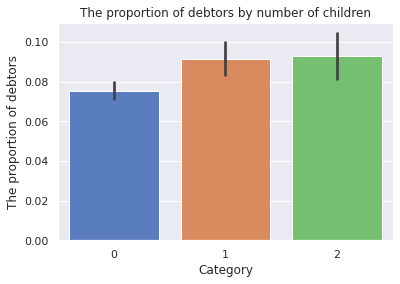

In [ ]:
a = sns.barplot(data=df, estimator=np.mean,
            x='children_group', y='debt', palette='muted')
a.set(xlabel='Category', ylabel='The proportion of debtors', 
      title='The proportion of debtors by number of children')
plt.show()

We will output the average percentage of debtors from the variable `total_debt`

In [ ]:
total_debt

0.08115036822970076

As we can see from the graph, there is a dependency between the presence of children and the timely repayment of the loan. People without children more often return the money on time, the percentage of debtors in this group is almost 0.6% lower than the average. The indicators of applicants with children exceed the average by 1% and more.
The overall trend is an increase in debtors proportional to the increase in the number of children in the family, however, since the distribution was far from equal, I doubt the accuracy of this conclusion.

### Dependence between Marital Status and Credit Repayment on Time

In [ ]:
df[['family_status', 'debt']].groupby('family_status').mean()\
.sort_values(by='debt', ascending=True)

,debt
family_status,
вдовец / вдова,0.065693
в разводе,0.071130
женат / замужем,0.075452
гражданский брак,0.093471
не женат / не замужем,0.097509


It would be possible to look for a dependency in the purchasing power of these different groups, but then it is unclear why unmarried people return money less often than divorced people. I think this is a topic for a separate study.
Conclusion - There is a difference of 3% between the extreme values, which is a significant difference and additional research is needed to establish dependencies (by the applicant's gender, for example).

### Dependence between Income Level and Credit Repayment on Time

Let's display the percentage of debtors in each category.
Legend of income groups:
- `0`: `20000 - 100000`
- `1`: `100000 - 140000`
- `2`: `140000 -160000`
- `3`: `160000 - 220000`
- `4`: `220000 - 2300000`


In [ ]:
df.groupby('income_group')['debt'].agg(['mean']).sort_values(by='income_group')

,mean
income_group,
0,0.079319
1,0.084924
2,0.090040
3,0.081494
4,0.070858


Now let's take a look at the graph of the change in the percentage of debtors depending on the category

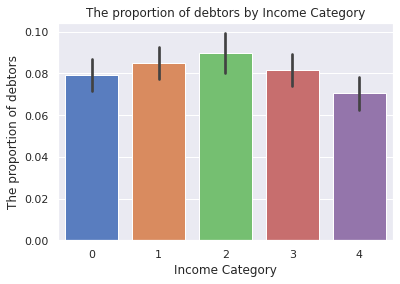

In [ ]:
a = sns.barplot(data=df, estimator=np.mean,
            x='income_group', y='debt', palette='muted')
a.set(xlabel='Income Category', ylabel='The proportion of debtors', 
      title='The proportion of debtors by Income Category')
plt.show()

We will output the average percentage of debtors from the variable `total_debt`

In [ ]:
total_debt

0.08115036822970076

The graph shows a dependency. Groups 1, 2 and 3 exceed the average percentage of debtors among applicants. That is, people with incomes from 100,000 to 220,000 on average more often fail to make loan payments than people with incomes up to 100,000 and people with incomes over 220,000.

### Dependence between Purpose of Obtaining a Loan and Credit Repayment on Time

In [ ]:
df[['purpose_group', 'debt']].groupby('purpose_group').mean().sort_values(by='debt', ascending=True)

,debt
purpose_group,
жилье/недвижимость,0.072334
свадьба,0.080034
образование,0.092200
автомобиль,0.093590


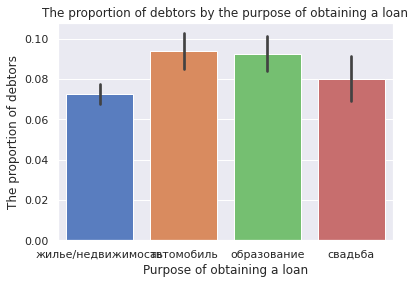

In [ ]:
a = sns.barplot(data=df, estimator=np.mean,
            x='purpose_group', y='debt', palette='muted')
a.set(xlabel='Purpose of obtaining a loan', ylabel='The proportion of debtors', 
      title='The proportion of debtors by the purpose of obtaining a loan')
plt.show()

There is definitely a correlation. We see that people who buy housing or other real estate are the least likely to default on payments. This may be because the real estate itself serves as collateral. Most debtors are in the category of people who take out loans for purchases or other operations with a car.

## General conclusion

As a result of the research, we found a correlation between timely repayment and three of the four factors:

- **Children.** Despite the dubiousness of the conclusion due to the unequal distribution of groups, we can conclude that the general trend is an increase in debtors proportional to the number of children in the family.
- **Marital status.** Yes, for different groups there is a different percentage of debtors here, but no dependencies within this research can be seen, a separate one needs to be done to identify dependencies.
- **Money.** The constructed graph showed that people with an average income for our group (100000 - 220000) are less likely to return the loan on time.
- **Purpose of loan.** People with the purpose of real estate operations are the most reliable borrowers, 92.8% of them return the money on time, while among those taking out a loan for car operations, only 90.6% are reliable.